# importing Neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
data=pd.read_csv('health_data.csv')


# Data Analysis

In [3]:
data.head(5)



,Record_Date,Patient_ID,Age,Gender,Admission_Date,Discharge_Date,Blood_Pressure,Gestational_Diabetes,Total_Billing_Amount,Payment_Status,Payment_Date,Staff_ID,Staff_Role,Staff_Satisfaction,IV_Fluids_Stock,Medications_Stock,Bed_Availability,Patient_Satisfaction,Readmission_Within_30_Days,Maternal_Outcome
0,31/12/2019,1,29,Male,01/01/2018,10/01/2018,126,1,87568,Paid,15/01/2018,1039,Doctor,1,299,601,1,4,1,Healthy
1,31/01/2020,2,28,Male,02/01/2018,04/01/2018,92,0,77041,Unpaid,05/01/2018,1041,Nurse,2,107,476,7,5,1,Healthy
2,29/02/2020,3,21,Female,03/01/2018,17/01/2018,148,1,19448,Unpaid,21/01/2018,1034,Admin,2,382,211,5,4,1,Healthy
3,31/03/2020,4,26,Male,04/01/2018,11/01/2018,116,1,88776,Unpaid,25/01/2018,1039,Admin,1,212,677,1,5,1,Healthy
4,30/04/2020,5,78,Male,05/01/2018,08/01/2018,121,1,69606,Paid,08/01/2018,1032,Admin,1,66,721,1,2,0,Healthy


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Record_Date                 1000 non-null   object
 1   Patient_ID                  1000 non-null   int64 
 2   Age                         1000 non-null   int64 
 3   Gender                      1000 non-null   object
 4   Admission_Date              1000 non-null   object
 5   Discharge_Date              1000 non-null   object
 6   Blood_Pressure              1000 non-null   int64 
 7   Gestational_Diabetes        1000 non-null   int64 
 8   Total_Billing_Amount        1000 non-null   int64 
 9   Payment_Status              1000 non-null   object
 10  Payment_Date                1000 non-null   object
 11  Staff_ID                    1000 non-null   int64 
 12  Staff_Role                  1000 non-null   object
 13  Staff_Satisfaction          1000 non-null   int64

In [5]:
data['Maternal_Outcome'].unique()

array(['Healthy', 'Critical', 'Deceased'], dtype=object)

In [6]:
data.select_dtypes(include=['number']).corr()

,Patient_ID,Age,Blood_Pressure,Gestational_Diabetes,Total_Billing_Amount,Staff_ID,Staff_Satisfaction,IV_Fluids_Stock,Medications_Stock,Bed_Availability,Patient_Satisfaction,Readmission_Within_30_Days
Patient_ID,1.000000,0.051171,-0.031209,-0.047425,0.002903,0.004552,0.003506,-0.034631,-0.029631,-0.005815,0.004252,0.009247
Age,0.051171,1.000000,-0.029650,0.013863,-0.054306,-0.001057,-0.024548,-0.054836,-0.042695,0.003298,0.005430,-0.024176
Blood_Pressure,-0.031209,-0.029650,1.000000,-0.011369,-0.013273,0.057764,0.016012,0.019964,-0.034898,0.037328,-0.014913,-0.008013
Gestational_Diabetes,-0.047425,0.013863,-0.011369,1.000000,0.022273,0.008381,-0.004685,-0.033279,-0.056214,-0.018845,-0.007764,0.014147
Total_Billing_Amount,0.002903,-0.054306,-0.013273,0.022273,1.000000,0.004774,0.011229,0.007505,0.000801,-0.033828,-0.034805,-0.016082
Staff_ID,0.004552,-0.001057,0.057764,0.008381,0.004774,1.000000,-0.050473,0.011225,0.045883,-0.017620,0.024982,0.043538
Staff_Satisfaction,0.003506,-0.024548,0.016012,-0.004685,0.011229,-0.050473,1.000000,-0.013545,-0.028319,0.004531,-0.019146,-0.007715
IV_Fluids_Stock,-0.034631,-0.054836,0.019964,-0.033279,0.007505,0.011225,-0.013545,1.000000,0.010591,-0.007197,-0.014094,0.025245
Medications_Stock,-0.029631,-0.042695,-0.034898,-0.056214,0.000801,0.045883,-0.028319,0.010591,1.000000,-0.006734,-0.021898,-0.022661
Bed_Availability,-0.005815,0.003298,0.037328,-0.018845,-0.033828,-0.017620,0.004531,-0.007197,-0.006734,1.000000,0.068503,-0.038098


In [7]:
data=data.drop(['Patient_ID', 'Staff_ID'], axis=1)


In [8]:
data.isnull().sum()

Record_Date                   0
Age                           0
Gender                        0
Admission_Date                0
Discharge_Date                0
Blood_Pressure                0
Gestational_Diabetes          0
Total_Billing_Amount          0
Payment_Status                0
Payment_Date                  0
Staff_Role                    0
Staff_Satisfaction            0
IV_Fluids_Stock               0
Medications_Stock             0
Bed_Availability              0
Patient_Satisfaction          0
Readmission_Within_30_Days    0
Maternal_Outcome              0
dtype: int64

In [9]:
data['Maternal_Outcome'].value_counts()

Healthy     761
Critical    176
Deceased     63
Name: Maternal_Outcome, dtype: int64

# performing visualization of the dataset

In [10]:
fig = px.histogram(data, x="Maternal_Outcome",   title="<b>Maternal Outcome</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [11]:
labels = data['Maternal_Outcome'].unique()
values = data['Maternal_Outcome'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Maternal Outcome Distribution</b>")
fig.show()

In [12]:
fig = px.histogram(data, y="Total_Billing_Amount",x='Payment_Status',color='Maternal_Outcome',title="<b>Total Billing Distribution</b>")
fig.update_layout(width=800, height=600, bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(data, y="Total_Billing_Amount",x='Payment_Status',color='Maternal_Outcome',title="<b>Bill Vs Payment Status</b>",barmode="group")
fig.update_layout(width=800, height=600, bargap=0.1)
fig.show()

In [14]:
labels = data['Staff_Role'].unique()
values = data['Staff_Role'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Staff Role Distribution</b>")
fig.show()

In [15]:
fig = px.box(data, y="Age",color='Maternal_Outcome', title="Age and Maternal Status</b>")
fig.update_layout(width=800, height=500, bargap=0.1)
fig.show()

In [16]:
fig = px.violin(data, y='Staff_Role',x='Maternal_Outcome', title="Staff role and Outcome</b>")
fig.update_layout(width=800, height=500, bargap=0.1)
fig.show()

# Data Preprocessing

In [17]:
data=data.drop(['Admission_Date','Discharge_Date','Record_Date','Payment_Date'], axis=1)

In [18]:
object_columns = data.select_dtypes(include='object').columns
object_columns= list(object_columns)
print(object_columns)

['Gender', 'Payment_Status', 'Staff_Role', 'Maternal_Outcome']


In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in object_columns: 
    data[x]=le.fit_transform(data[x])
data.head()

,Age,Gender,Blood_Pressure,Gestational_Diabetes,Total_Billing_Amount,Payment_Status,Staff_Role,Staff_Satisfaction,IV_Fluids_Stock,Medications_Stock,Bed_Availability,Patient_Satisfaction,Readmission_Within_30_Days,Maternal_Outcome
0,29,1,126,1,87568,0,1,1,299,601,1,4,1,2
1,28,1,92,0,77041,1,2,2,107,476,7,5,1,2
2,21,0,148,1,19448,1,0,2,382,211,5,4,1,2
3,26,1,116,1,88776,1,0,1,212,677,1,5,1,2
4,78,1,121,1,69606,0,0,1,66,721,1,2,0,2


<AxesSubplot:>

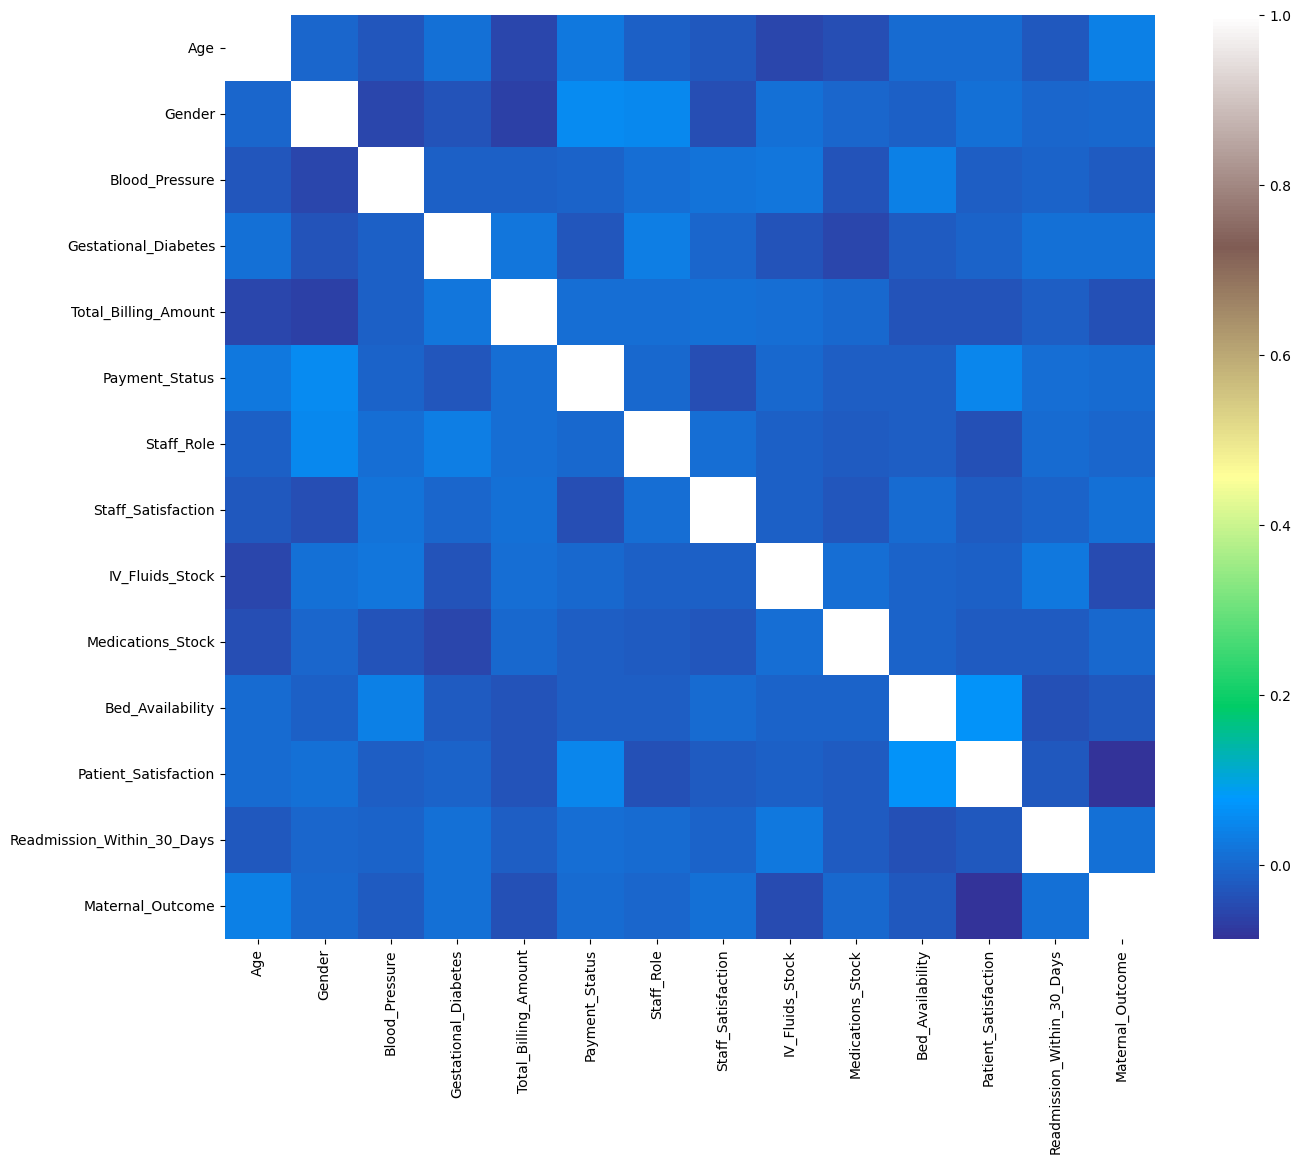

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),cmap='terrain')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         1000 non-null   int64
 1   Gender                      1000 non-null   int64
 2   Blood_Pressure              1000 non-null   int64
 3   Gestational_Diabetes        1000 non-null   int64
 4   Total_Billing_Amount        1000 non-null   int64
 5   Payment_Status              1000 non-null   int64
 6   Staff_Role                  1000 non-null   int64
 7   Staff_Satisfaction          1000 non-null   int64
 8   IV_Fluids_Stock             1000 non-null   int64
 9   Medications_Stock           1000 non-null   int64
 10  Bed_Availability            1000 non-null   int64
 11  Patient_Satisfaction        1000 non-null   int64
 12  Readmission_Within_30_Days  1000 non-null   int64
 13  Maternal_Outcome            1000 non-null   int64
dtypes: int64(

In [22]:
x=data.drop(['Maternal_Outcome'], axis=1)
y=data[['Maternal_Outcome']]

In [23]:
x

,Age,Gender,Blood_Pressure,Gestational_Diabetes,Total_Billing_Amount,Payment_Status,Staff_Role,Staff_Satisfaction,IV_Fluids_Stock,Medications_Stock,Bed_Availability,Patient_Satisfaction,Readmission_Within_30_Days
0,29,1,126,1,87568,0,1,1,299,601,1,4,1
1,28,1,92,0,77041,1,2,2,107,476,7,5,1
2,21,0,148,1,19448,1,0,2,382,211,5,4,1
3,26,1,116,1,88776,1,0,1,212,677,1,5,1
4,78,1,121,1,69606,0,0,1,66,721,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,26,0,91,0,58505,1,1,1,316,734,6,4,1
996,34,0,105,1,15117,1,1,5,382,314,1,2,1
997,97,0,105,1,50706,0,2,3,425,361,3,2,1
998,86,0,140,1,20333,1,3,2,210,943,7,2,0


In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         1000 non-null   int64
 1   Gender                      1000 non-null   int64
 2   Blood_Pressure              1000 non-null   int64
 3   Gestational_Diabetes        1000 non-null   int64
 4   Total_Billing_Amount        1000 non-null   int64
 5   Payment_Status              1000 non-null   int64
 6   Staff_Role                  1000 non-null   int64
 7   Staff_Satisfaction          1000 non-null   int64
 8   IV_Fluids_Stock             1000 non-null   int64
 9   Medications_Stock           1000 non-null   int64
 10  Bed_Availability            1000 non-null   int64
 11  Patient_Satisfaction        1000 non-null   int64
 12  Readmission_Within_30_Days  1000 non-null   int64
dtypes: int64(13)
memory usage: 101.7 KB


In [25]:
y

,Maternal_Outcome
0,2
1,2
2,2
3,2
4,2
...,...
995,0
996,2
997,1
998,0


# Feature Selection

['Total_Billing_Amount', 'IV_Fluids_Stock', 'Medications_Stock', 'Blood_Pressure', 'Age']


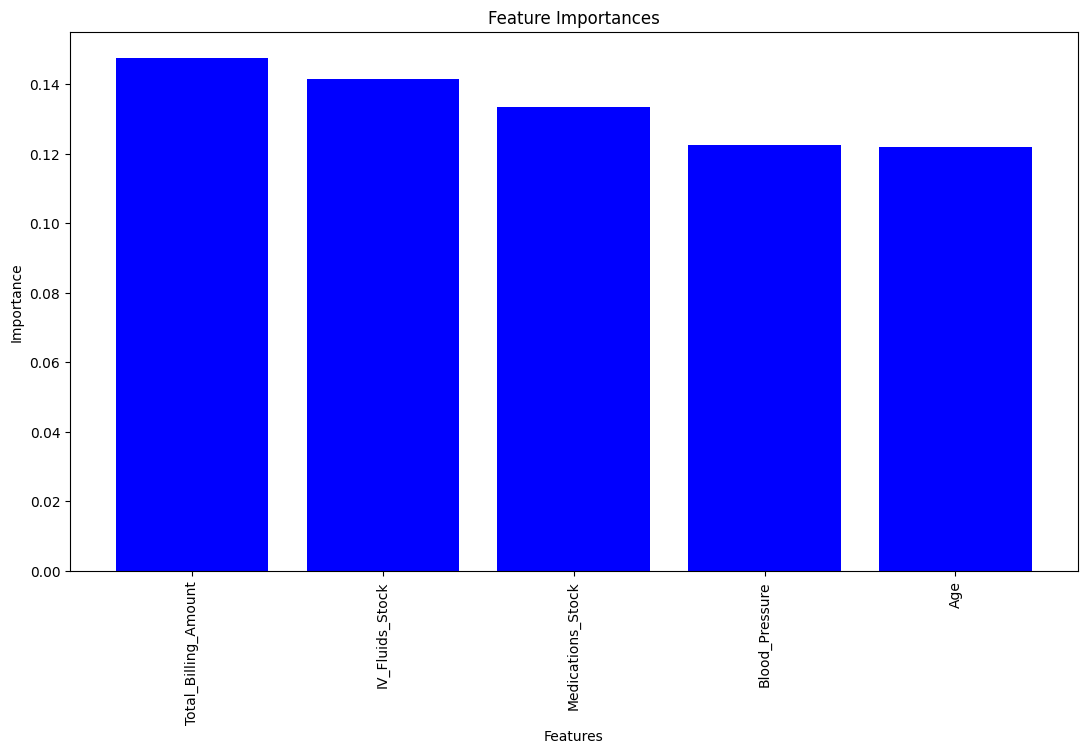

In [26]:
rf = RandomForestClassifier()
rf.fit(x,y)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
ifs=importance_df['Feature'][:5]
selected_columns = list(ifs)
print(selected_columns)

plt.figure(figsize=(13,7))
plt.bar(ifs, importance_df['Importance'][:5], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()



In [27]:
data2=data[['Total_Billing_Amount', 'IV_Fluids_Stock', 'Medications_Stock', 'Blood_Pressure', 'Age','Maternal_Outcome']]

In [28]:
x=data[['Total_Billing_Amount', 'IV_Fluids_Stock', 'Medications_Stock', 'Blood_Pressure', 'Age']]

In [29]:
x

,Total_Billing_Amount,IV_Fluids_Stock,Medications_Stock,Blood_Pressure,Age
0,87568,299,601,126,29
1,77041,107,476,92,28
2,19448,382,211,148,21
3,88776,212,677,116,26
4,69606,66,721,121,78
...,...,...,...,...,...
995,58505,316,734,91,26
996,15117,382,314,105,34
997,50706,425,361,105,97
998,20333,210,943,140,86


In [30]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)



In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [32]:
sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [33]:
dt=DecisionTreeClassifier()
kFold=StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(dt, x_train, y_train, cv=kFold, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
print(classification_report(predictions,y_test))


Cross-validation scores: [0.6420765  0.65479452 0.63835616 0.68219178 0.66849315]
Mean accuracy: 0.6571824238341193
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       159
           1       0.83      0.75      0.79       178
           2       0.49      0.55      0.52       120

    accuracy                           0.68       457
   macro avg       0.67      0.67      0.67       457
weighted avg       0.69      0.68      0.69       457



In [34]:
rf=RandomForestClassifier()
kFold=StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(rf, x_train, y_train, cv=kFold, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print(classification_report(predictions,y_test))


Cross-validation scores: [0.75136612 0.80547945 0.7890411  0.7890411  0.81369863]
Mean accuracy: 0.7897252788382363
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       176
           1       0.93      0.82      0.87       181
           2       0.59      0.79      0.67       100

    accuracy                           0.80       457
   macro avg       0.79      0.80      0.78       457
weighted avg       0.82      0.80      0.80       457

